In [3]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [4]:
# let G = (V, E) be the input undirected graph
V = list(range(1, 64))
E = [ None,
     # the central part
     [2,  20, 21, 22, 54],         [1,  3,  21, 40],             [2,  40, 39, 4],
     [3,  5,  38, 39],             [4,  6,  37, 38],             [5,  7,  36, 37],
     [6,  8,  35, 36],             [7,  9,  34, 35],             [8,  10, 33, 34],
     [9,  11, 32, 33],             [10, 12, 31, 32],             [11, 13, 30, 31],
     [12, 14, 29, 30],             [13, 15, 28, 29],             [14, 16, 27, 28],
     [15, 17, 26, 27],             [16, 18, 25, 26],             [17, 19, 24, 25, 59], 
     [18, 20, 23, 24],             [1,  19, 22, 23],             [1,  2,  22, 41], 
     [1,  20, 21, 41],             [19, 20, 24, 50],             [18, 19, 23, 50],
     [17, 18, 26, 49],             [16, 17, 25, 27, 49],         [15, 16, 26, 48, 49],
     [14, 15, 29, 47, 48],         [13, 14, 28, 30, 47],         [12, 13, 29, 47], 
     [11, 12, 32, 46],             [10, 11, 31, 46],             [9, 10, 34, 45],
     [8, 9, 33, 45],               [7, 8, 36, 44],               [6, 7, 35, 37, 44],
     [5, 6, 36, 43, 44],           [4, 5, 39, 42, 43],           [3, 4, 38, 40, 42], 
     [2, 3, 39, 42],               [21, 22, 42, 51],             [38, 39, 40, 41, 43, 51, 53],
     [37, 38, 42, 44],             [35, 36, 37, 43, 45, 52, 53], [33, 34, 44, 52],
     [31, 32, 47, 52],             [28, 29, 30, 46, 48, 52, 53], [27, 28, 47, 49],
     [25, 26, 27, 48, 50, 51, 53], [23, 24, 49, 51],             [41, 42, 49, 50, 53],
     [44, 45, 46, 47, 53],         [42, 44, 47, 49, 51, 52],

     # the pentagon 1
     [1, 55, 58],                  [54, 56],                     [55, 57],
     [56, 58],                     [54, 57, 59],
     
     # the pentagon 2
     [18, 58, 60, 63],             [59, 61],                     [60, 62],
     [61, 63],                     [62, 59] 
    ]

In [5]:
G = nx.Graph()

# adding vertices
G.add_nodes_from(V)
G.number_of_nodes()

63

In [6]:
# adding edges
for node in V:
    for neighbor in E[node]:
        G.add_edge(node, neighbor)
        
G.number_of_edges()

131

In [7]:
def plot_graph(g):
    plt.figure(3,figsize=(10,6))
    nx.draw_kamada_kawai(g, with_labels = True)

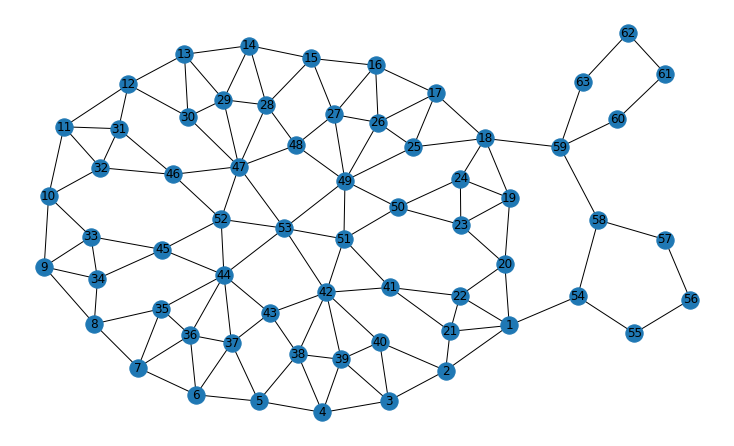

In [8]:
plot_graph(G)

In [9]:
# computing max peel value for the input graph
def getMaxPeelValue(G, name="new"):
    
    G_copy = G.copy()

    iteration = 0
    peel_value = 0
    degrees = [val for (node, val) in G_copy.degree()]

    plt.figure(figsize = (35, 45)) 

    while len(G_copy.nodes) > 0:
        iteration += 1
        fringe = G_copy.nodes
        fringe_degrees = [val for (node, val) in G_copy.degree()]

        # pick the vertices of minimum degree 
        min_degree = min(fringe_degrees)
        peel_value = max(peel_value, min_degree)
        min_degree_nodes = [node for index, node in enumerate(fringe) if G_copy.degree(node) == min_degree]

        plt.subplot(920+iteration)
        plt.title("-----Iteration :" + str(iteration) +
                  "------\nMin degree = " + str(min_degree) +
                  " \nMin degree Indices = {" + str(min_degree_nodes) +
                  "} \nPeel Value = " + str(peel_value))

        nx.draw_kamada_kawai(G_copy, with_labels = True)

        # remove the min degree vertices from fringe
        for node in min_degree_nodes:
            G_copy.remove_node(node)
    
    plt.savefig("peelvalue/PeelValue-"+ name + str(iteration) +".png", format="PNG")
    return peel_value

4

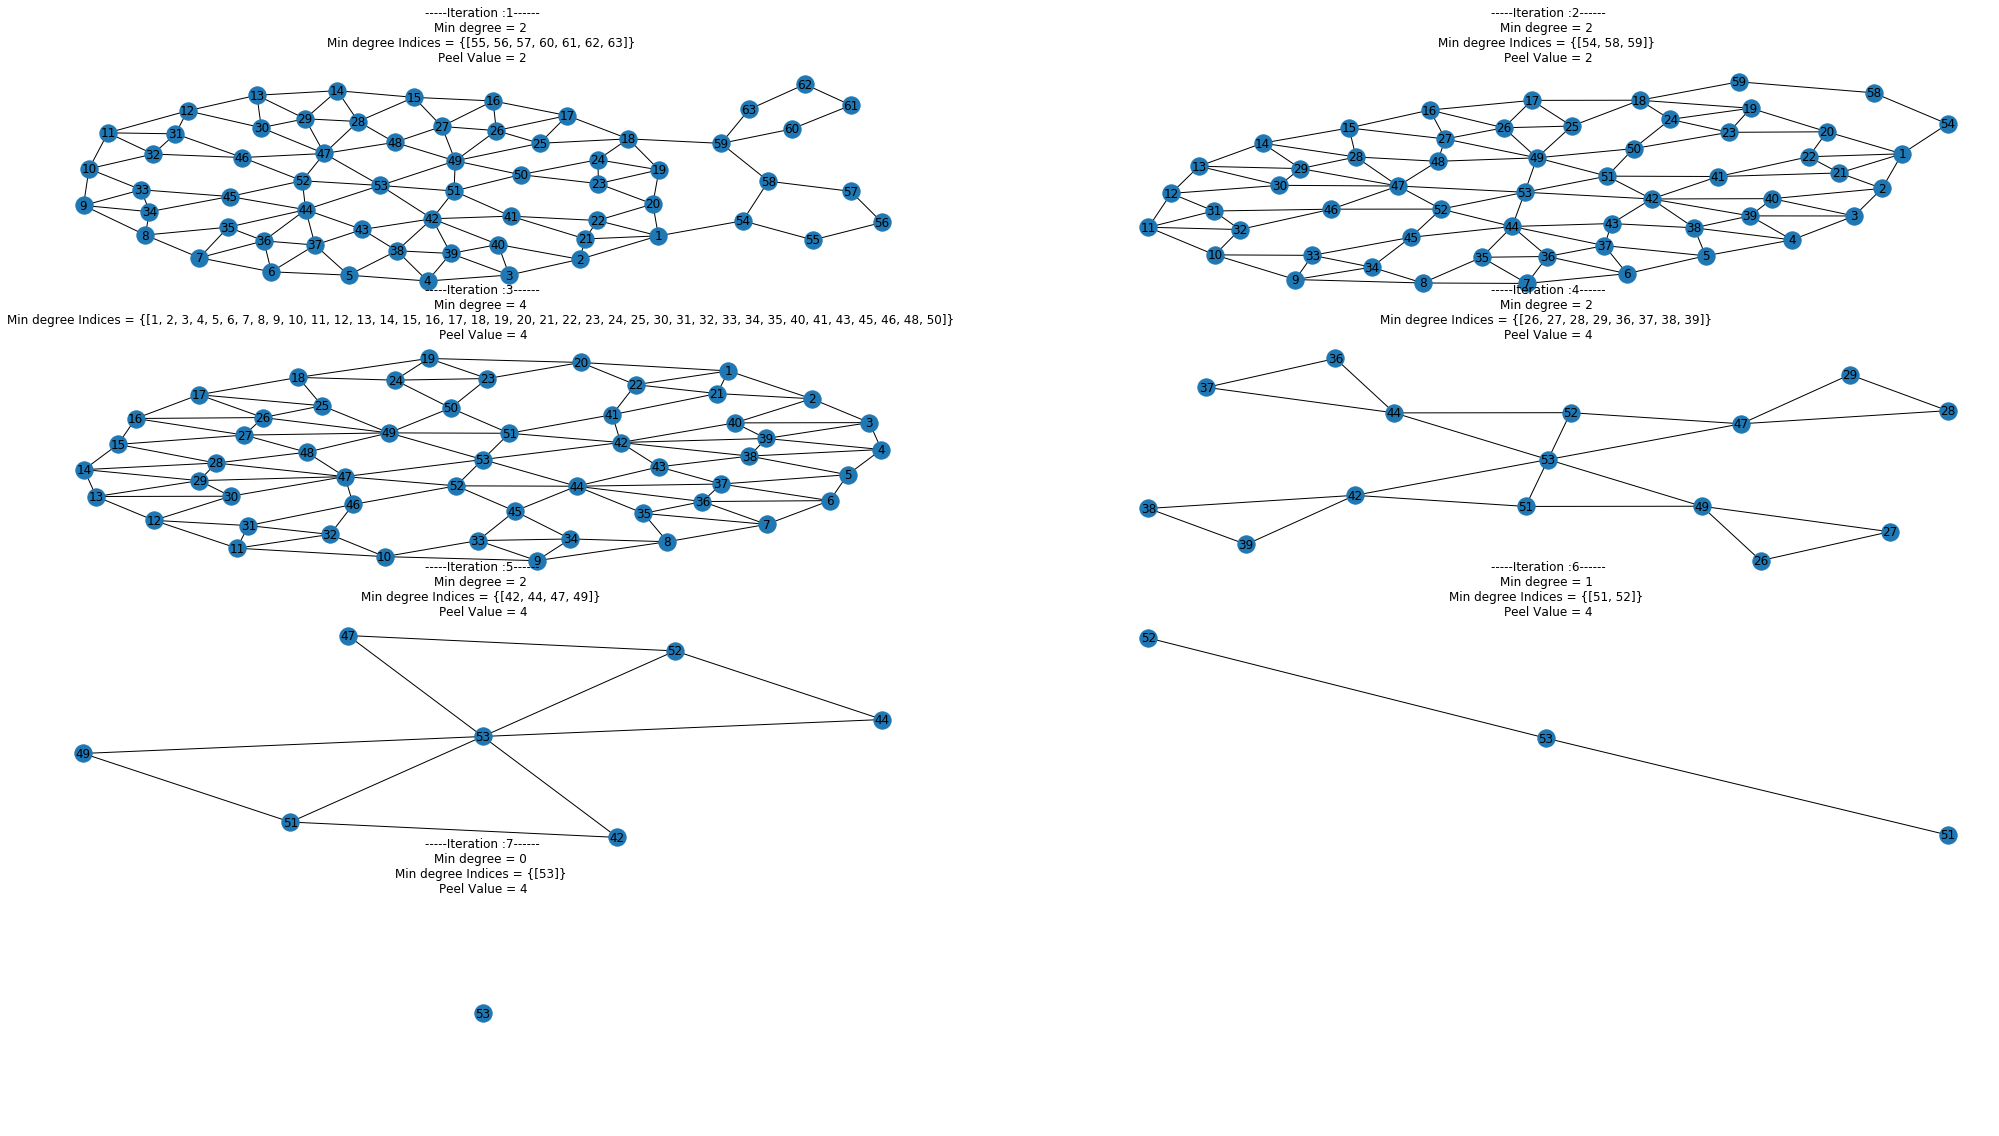

In [10]:
getMaxPeelValue(G, name="original")

In [43]:
def getWave(G, S0, P, name="1"):
    G_copy = G.copy()
    
    iteration = 0
    print("S 0 : ", S0)
    
    S = []
    edges_within_frag = []
    edge_fragments = []

    plt.figure(figsize = (20, 10))
    plt.set_cmap("viridis")
    
    G_wave = nx.Graph()
    while len(S0) > 0:
        iteration += 1
        S.append(S0)
        
        S1 = set()
        b_edges = []
        f_edges = []
        G_wave.add_nodes_from(S0)
        
        # Remove the Frag of S0 in G
        for node in S0:
            
            # E(G[S0])
            for node1 in S0:
                if (node1 in G_copy and 
                    node1 != node and 
                    (node1, node) in G_copy.edges() and
                    (node1, node) not in f_edges and
                    (node, node1) not in f_edges):
                    
                    G_copy.remove_edge(node, node1)
                    f_edges.append((node, node1))
            
            # BE(G[S0])
            for neighbor in E[node]:
                if node in G_copy and neighbor in G_copy:
                    
                    if neighbor not in S0:
                        S1.add(neighbor)
                        b_edges.append((node, neighbor))
                    
                    if (node, neighbor) in G_copy.edges():
                        G_copy.remove_edge(node, neighbor)

                    if(G_copy.degree(node) == 0):
                        G_copy.remove_node(node)

                    if(G_copy.degree(neighbor) == 0):
                        G_copy.remove_node(neighbor)
                        
                    elif(G_copy.degree(neighbor) > P):
                        S1.discard(neighbor)
        
            
        print("Boundary edges:", b_edges)       
        print("S", iteration, ":", S1)
        S0 = S1
        edges_within_frag.append(f_edges)
        if len(b_edges) > 0 and len(S0) > 0:
            edge_fragments.append(b_edges + f_edges)
            G_wave.add_edges_from(b_edges + f_edges)
            
    
    # Plot Wave
    if(len(G_wave.nodes()) > 0):
        plot_wave(name, G_wave, S, edges_within_frag, iteration)
    else:
        print("No nodes to plot in graph wave.")
        
        
    # Plot leftover G
    if(len(G_copy.nodes()) > 0):
        plot_graph(G_copy)
    else:
        print("No nodes to plot in leftover graph.")
    
    return [S, edge_fragments, G_wave, G_copy]


def plot_wave(name, G_wave, S, edges_within_frag, iteration):
    plt.title("-----Wave :" + name + "------\n")
    
    pos = nx.kamada_kawai_layout(G_wave, scale=0.5)
    viridis = cm.get_cmap('viridis', 12)
    for index in range(len(S)):
        #print("Ps: ", pos)
        new_pos = {key: pos[key] + [0, index*2] for key in pos}
        #print("Ps new: ", new_pos)
        
        edge_list = edges_within_frag[index] if index < len(edges_within_frag) else None
        new_color_map = [viridis(index * 0.3)] * len(S[index])
        
        nx.draw_networkx(G_wave,
                         new_pos,
                         with_labels = True,
                         font_color="white",
                         set_cmap="viridis",
                         nodelist=S[index],
                         edgelist=edge_list,
                         node_color=new_color_map)
    
    plt.savefig("waves/Wave-"+ name + str(iteration) +".png", format="PNG")

Wave 1:
S 0 :  [55, 56, 57, 58, 60, 61, 62, 63]
Boundary edges: [(55, 54), (58, 54), (58, 59), (60, 59), (63, 59)]
S 1 : {59, 54}
Boundary edges: [(59, 18), (54, 1)]
S 2 : set()


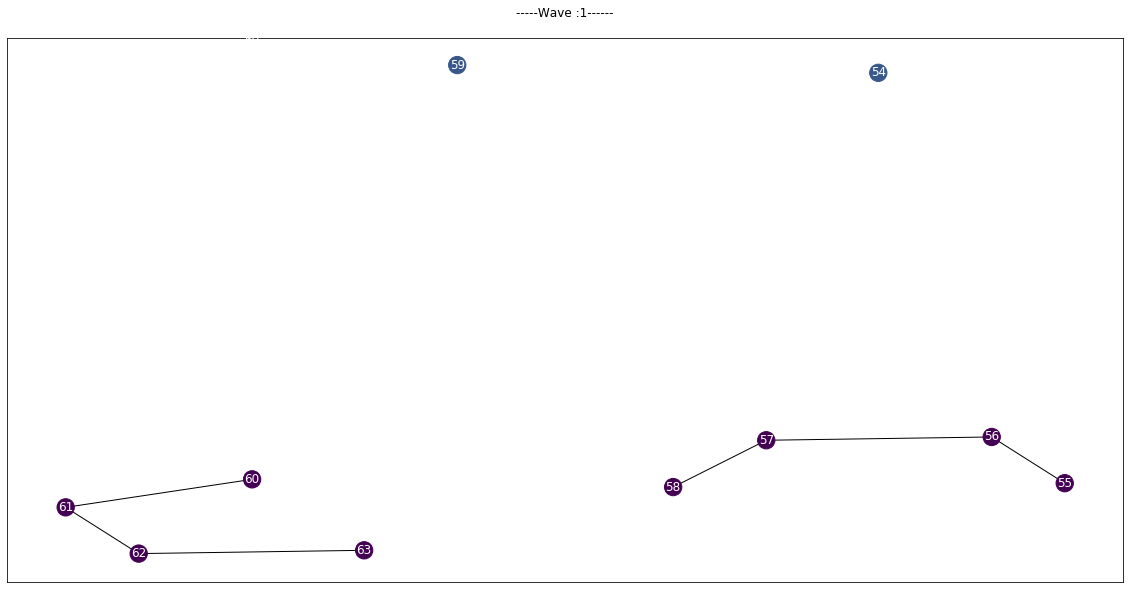

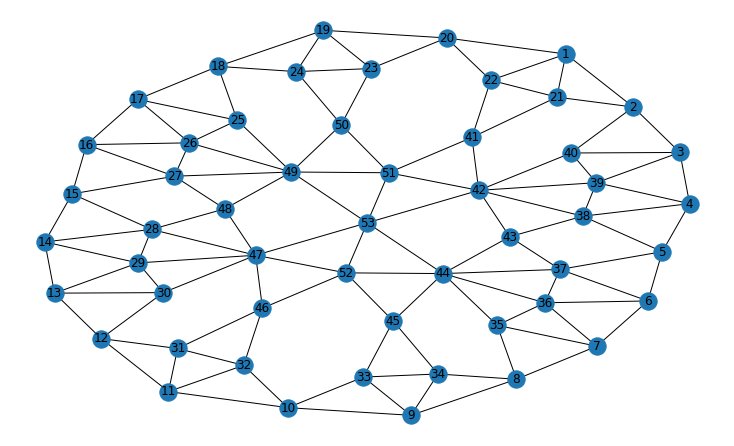

In [44]:
print("Wave 1:")
P = 2
S0 = [ 55, 56, 57, 58, 60, 61, 62, 63 ]
fragments_wave_1, boundary_edges_wave_1, wave, leftover_G = getWave(G, S0, P, "1")

Wave 2:
S 0 :  []
No nodes to plot in graph wave.


<Figure size 1440x720 with 0 Axes>

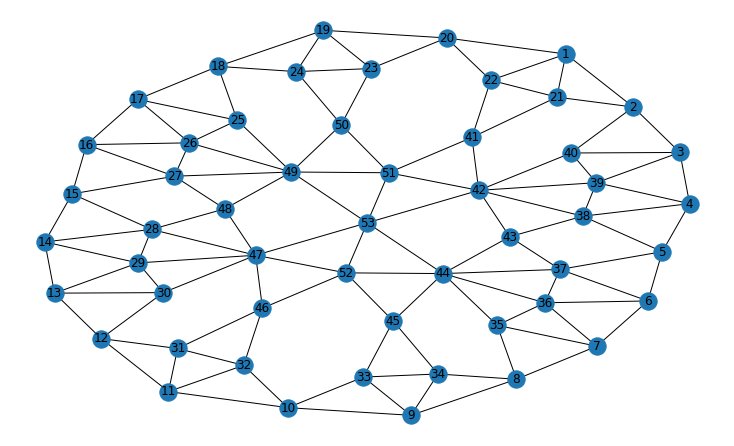

In [45]:
print("Wave 2:")
S0 = [node for node in list(leftover_G.nodes()) if leftover_G.degree(node) <= P]
fragments_wave_2, boundary_edges_wave_2, wave, leftover_G = getWave(leftover_G, S0, P, "2")

In [ ]:
def getGraphWithPeelValue(G, peelValue):
    G_core = G.copy()
    

In [ ]:
# Iterative edge decomposition
G_copy = G.copy()

iteration = 0
plt.figure(figsize =(35, 30)) 

while len(G_copy.nodes) > 0:
    iteration += 1
    fringe = G_copy.nodes

    peel_value = getPeelValue(G_copy, "ED-" + str(interation))
    max_peel_value_edges = {}
    
    # adding edges weights 
    # w (u, v) = -1 if degree(u) != degree(v)
    # w (u, v) = degree(u) = degree(v)
    max_edge_weight = 0
    for node in V:
        degree_node = G_copy.degree(node)
        for neighbor in E[node]:
            degree_neighbor = G_copy.degree(neighbor)
            
            if(degree_node >= peel_value and
               degree_node == degree_neighbor):
                
                G_copy[node][neighbor]['weight'] = degree_node
                max_edge_weight = max(max_edge_weight, degree_node)

                max_peel_value_edges.add((node, neighbor))

            else:
                G_copy[node][neighbor]['weight'] = -1                    
    
    # Remove the edges with max edge weight 
    for u, v in max_peel_value_edges:
        if u in G_copy and v in G_copy:
            G_copy.remove_edge(u, v)
            
            if(G_copy.degree(u) == 0):
                G_copy.remove_node(u)
            
            if(G_copy.degree(v) == 0):
                G_copy.remove_node(v)
    
    
        
                                         
    
    plt.subplot(920+iteration)
    plt.title("-----Iteration :"+ str(iteration)+ "------\nMin degree = "+ str(min_degree)+
          " \nMin degree Indices = {"+ str(min_degree_nodes)+ "} \nPeel Value = "+ str(peel_value))
    
    nx.draw_kamada_kawai(G_copy, with_labels = True)
    plt.savefig("edgedecomposition/ed" + str(iteration) +".png", format="PNG")
    
    # remove the min degree vertices from fringe
    for node in min_degree_nodes:
        G_copy.remove_node(node)
    
    print("-----Iteration :", iteration, "------\nMin degree = ", min_degree,
          " \nMin degree Indices = {", min_degree_nodes, "} \nPeel Value = ", peel_value)



        
G.number_of_edges()